In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploring

In [418]:
df = pd.read_csv('german_credit_data.csv')

In [419]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [420]:
df = df.drop('Unnamed: 0', axis=1)

In [421]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [422]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [424]:
df['Risk'].unique()

array(['good', 'bad'], dtype=object)

In [425]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [426]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [427]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [428]:
df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [429]:
df['Job'].unique()

array([2, 1, 3, 0])

In [430]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

# Detect the missing data

In [431]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

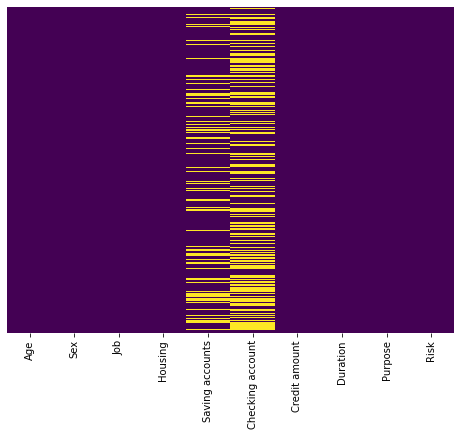

In [432]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=[], cmap='viridis');

# Data Visualization 

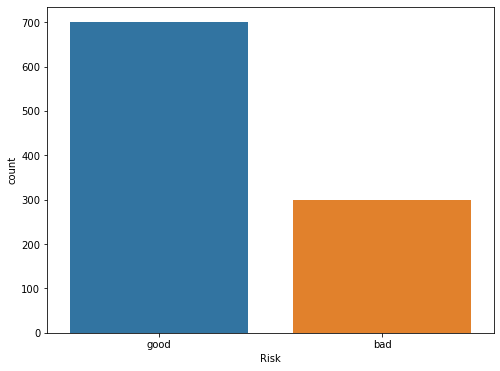

In [433]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Risk', data=df); # the target columSn is very unbalanced 

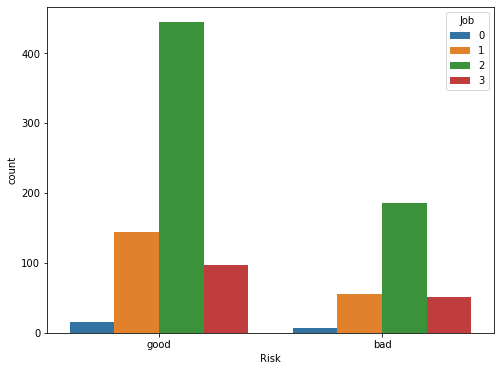

In [434]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Risk', data=df, hue='Job');

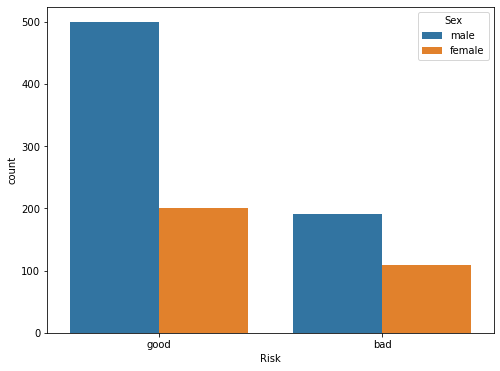

In [435]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Risk', data=df, hue='Sex');

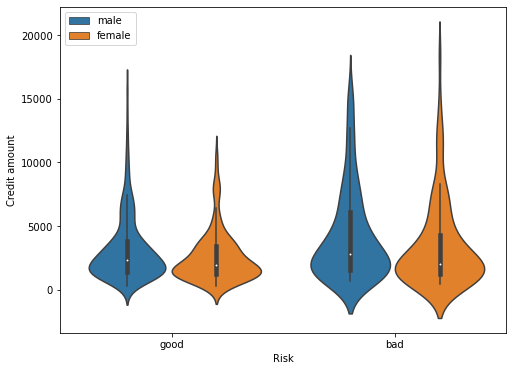

In [436]:
fig = plt.figure(figsize=(8,6))
sns.violinplot(x='Risk', y='Credit amount', data=df, hue='Sex')
plt.legend(loc='upper left');

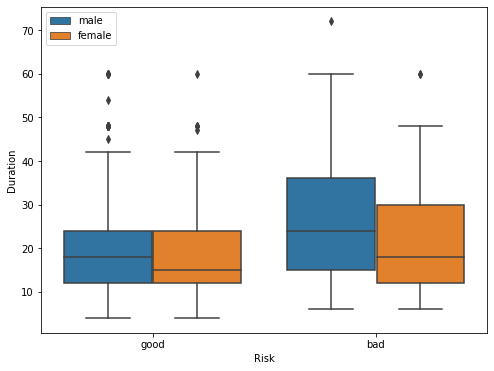

In [437]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x='Risk', y='Duration', data=df, hue='Sex')
plt.legend(loc='upper left');

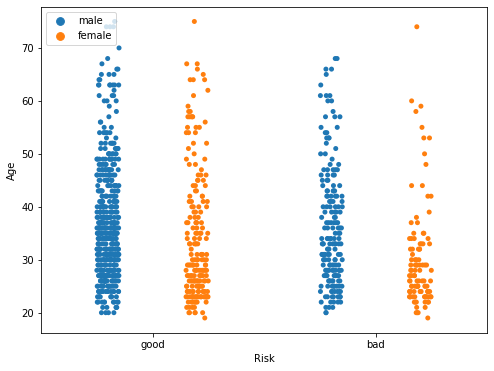

In [438]:
fig = plt.figure(figsize=(8,6))
sns.stripplot(x='Risk', y='Age', data=df, hue='Sex', dodge=True)
plt.legend(loc='upper left');

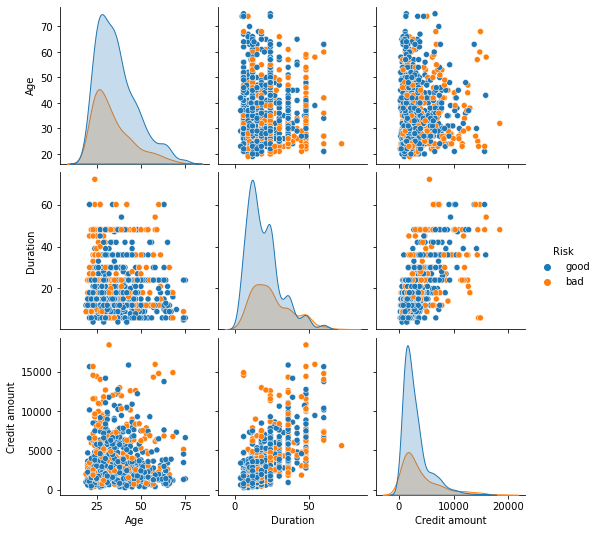

In [439]:
sns.pairplot(data=df,vars=['Age', 'Duration', 'Credit amount'], hue='Risk');

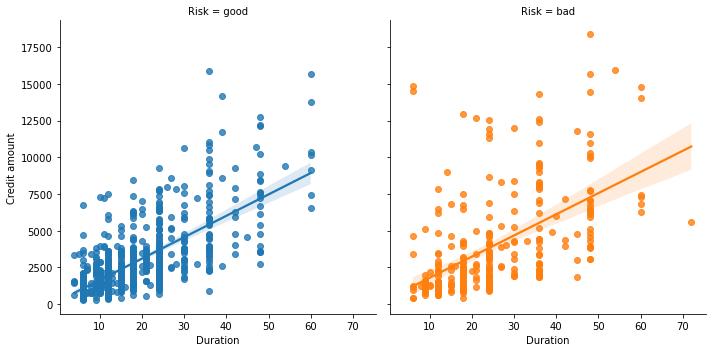

In [440]:
sns.lmplot(x='Duration', y='Credit amount', data=df, col='Risk', hue='Risk');

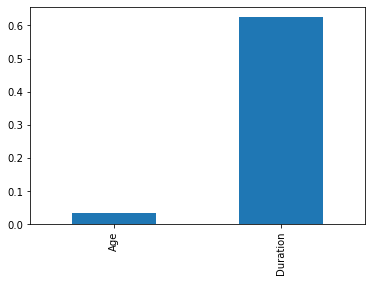

In [441]:
df[['Age', 'Credit amount', 'Duration']].corr().iloc[1].sort_values()[:-1].plot(kind='bar'); # seems like duration and Credit amount are kinda correlated. 

# Features engineering

In [442]:
Job = pd.get_dummies(df['Job'], drop_first =True)

In [443]:
df = df.drop('Job', axis=1).join(Job)

In [444]:
scaler = {'male':1, 'female':0}

In [445]:
scaler2 = {'good':1, 'bad':0}

In [446]:
df = df.replace(scaler)

In [447]:
df = df.replace(scaler2)

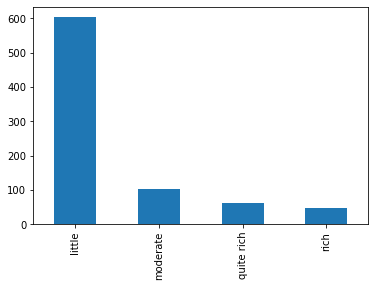

In [448]:
df['Saving accounts'].value_counts().plot(kind='bar');

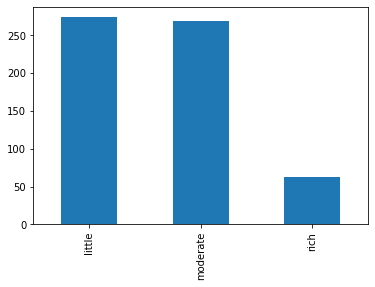

In [449]:
df['Checking account'].value_counts().plot(kind='bar');

In [527]:
df = df.fillna(method='pad')

In [528]:
df = pd.get_dummies(df)

In [529]:
df.head()

,Age,Sex,Credit amount,Duration,Risk,1,2,3,Housing_free,Housing_own,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,1169,6,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,0,5951,48,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,45,1,7882,42,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,4870,24,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# Build a RandomForest model and evaluate the model

In [530]:
from sklearn.ensemble import RandomForestClassifier

In [531]:
from sklearn.model_selection import train_test_split

In [550]:
from sklearn.model_selection import GridSearchCV

In [551]:
X = df.drop('Risk', axis=1).copy()
y = df['Risk']

In [566]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=101, stratify=y)

In [567]:
forest = RandomForestClassifier()

In [568]:
forest.fit(Xtrain, ytrain)

RandomForestClassifier()

In [569]:
pred = forest.predict(Xtest)

In [570]:
confusion_matrix(pred, ytest)

array([[ 28,  22],
       [ 62, 188]])

In [571]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.56      0.31      0.40        90
           1       0.75      0.90      0.82       210

    accuracy                           0.72       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.69      0.72      0.69       300



# ROC curve

In [572]:
from sklearn.metrics import roc_curve

In [573]:
fpr,tpr,threshold = roc_curve(ytest, forest.predict_proba(Xtest)[:,1])

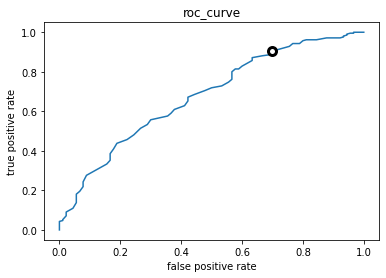

In [574]:
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
zero = np.argmin(np.abs(threshold-0.5))
plt.plot(fpr[zero], tpr[zero], 'ok', mew=3,fillstyle=None, mfc='white', ms=8);

# recall precision curve

In [575]:
from sklearn.metrics import precision_recall_curve

In [576]:
precision, recall, threshold = precision_recall_curve(ytest, forest.predict_proba(Xtest)[:,1])

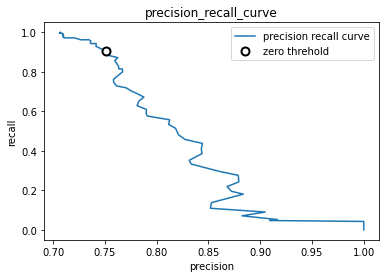

In [577]:
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision_recall_curve')
zero= np.argmin(np.abs(threshold-0.5))
plt.plot(precision[zero], recall[zero], 'ok', mew=2, mfc='white', ms=8, label='zero threhold')
plt.legend(); 

In [578]:
precision2, recall2, threshold2 = precision_recall_curve(ytest, forest.predict_proba(Xtest)[:,0])

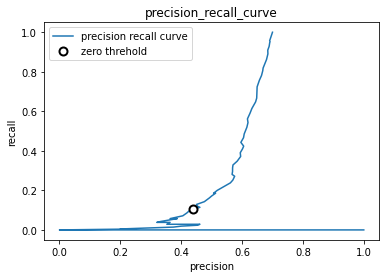

In [579]:
plt.plot(precision2, recall2, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision_recall_curve')
zero = np.argmin(np.abs(threshold2-0.5))
plt.plot(precision2[zero], recall2[zero], 'ok', mew=2, mfc='white', ms=8, label='zero threhold')
plt.legend(); 